In [1]:
%matplotlib inline
from pycocotools.cocoz import ImageZ, AnnZ, COCOZ
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [2]:
root = 'E:\Data\coco'
annType = 'stuff_annotations_trainval2017'

annZ = AnnZ(root, annType)
annZ.names

['annotations/stuff_train2017_pixelmaps.zip',
 'annotations/stuff_val2017_pixelmaps.zip',
 'annotations/stuff_val2017.json',
 'annotations/stuff_train2017.json',
 'annotations/deprecated-challenge2017/val-ids.txt',
 'annotations/deprecated-challenge2017/train-ids.txt']

In [3]:
# initialize COCO api for instance annotations
#annFile = 'annotations/instances_val2017.json'
annFile = 'annotations/stuff_val2017.json'
coco = COCOZ(annZ, annFile)

Loading json in memory ...
used time: 1.79639 s
Loading json in memory ...
creating index...
index created!
used time: 0.600998 s


In [4]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms = set([cat['name'] for cat in cats])  # 获取 cat 的 name 信息
print('COCO categories: \n{}\n'.format(' '.join(nms)))
# ============================================================
snms = set([cat['supercategory'] for cat in cats])  # 获取 cat 的 name 信息
print('COCO supercategories: \n{}'.format(' '.join(snms)))

COCO categories: 
fruit floor-stone fence bush leaves salad wall-concrete textile-other window-other snow tent river plastic carpet tree counter grass skyscraper solid-other curtain blanket floor-tile other desk-stuff ceiling-other sea bridge mirror-stuff sky-other wall-wood table railing gravel building-other sand light ground-other clouds cage furniture-other net waterdrops house water-other cardboard clothes playingfield rug napkin floor-other cloth wall-brick wood straw fog ceiling-tile plant-other floor-wood hill towel rock door-stuff structural-other pavement wall-stone shelf pillow stone dirt road roof railroad food-other metal mountain moss mud cabinet vegetable branch wall-panel wall-tile platform paper banner floor-marble cupboard wall-other flower stairs mat window-blind

COCO supercategories: 
food-stuff wall building window ceiling solid other furniture-stuff plant floor ground water sky structural textile raw-material


In [5]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person','dog','skateboard']);
imgIds = coco.getImgIds(catIds=catIds );
imgIds = coco.getImgIds(imgIds = [324158])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

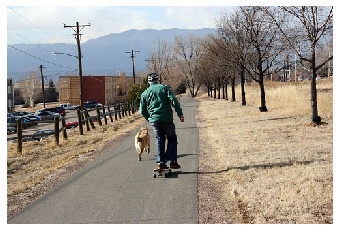

In [7]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

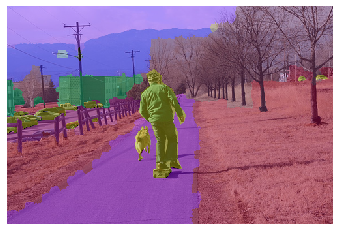

In [14]:
# load and display instance annotations
plt.imshow(I)
plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [25]:
anns[0]['segmentation']['counts']

{'counts': 'a3h1f8000000O110O003N2^NYGV1P9LmFmNS9n0lFSOW9k0jFTOO0X9h0nFWOJ1X9g0oFXOU9g0811OO11O1O1O1@XF8j9DYF;h9DZF:n9O1GmE4X:MdW4:ShK10M21000O01O12M10O10O4M2N0031MN3Nkk40TTK1eE1V:4XFLU94hFJG2a95gFJG4[97dFH3LO7m8U11L310000000000000O0100N21OO100O101O1O04MO00000010OO1000000001OF:003L7KO1O1OHWGlNf8NUGV17kNb80WGU18jN`8Z1`GfN`8Z1;OUGgNa8X1`GhN`8X1`GhN`8X1`GhN`8W1aGjN^8V1bGjN^8V1>O0O2O0000000000000001O1O002N1O1O006J00001O0000000001O0AYGUOi8k0=O11O0000N20000O1001O1O2N000000000K500O11O003K4L3HeF[OZ9f08M200O1O100O1N2OO0010N40O01ON112N0000O100O4K4N4Jkin2',
 'size': [334, 500]}

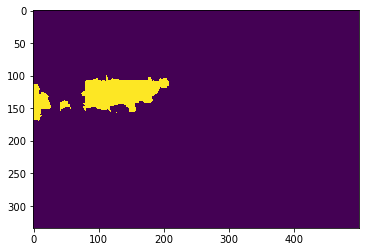

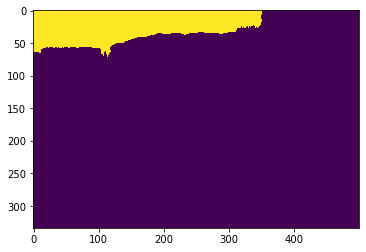

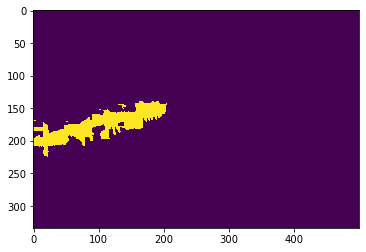

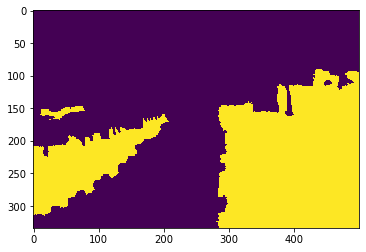

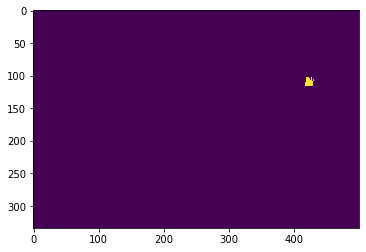

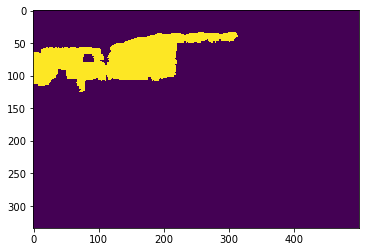

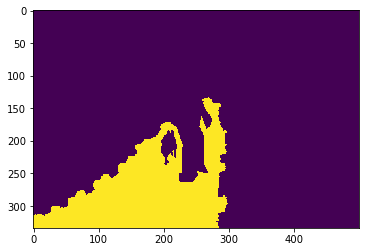

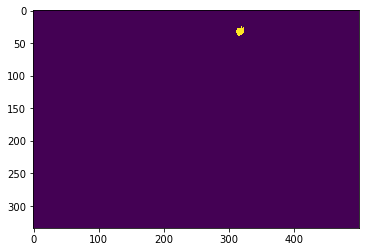

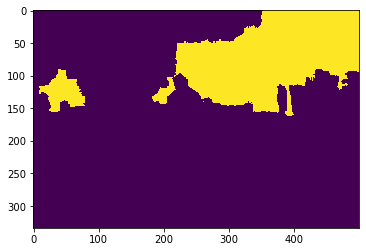

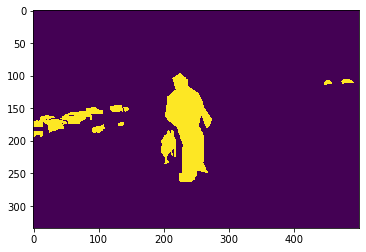

In [40]:
updated_data = []

# For each annotation
for annotation in anns:

    # Initialize variables
    obj = {}
    segmentation = []
    segmentation_polygons = []

    # Decode the binary mask
    mask_list = mask.decode(annotation['segmentation'])
    mask_list = np.ascontiguousarray(mask_list, dtype=np.uint8)
    plt.imshow(mask_list*255)
    plt.show()
    contours, hierarchy = cv2.findContours((mask_list).astype(np.uint8), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Get the contours
    for contour in contours:
        contour = contour.flatten().tolist()
        segmentation.append(contour)
        if len(contour) > 4:
            segmentation.append(contour)
    if len(segmentation) == 0:
        continue

    # Get the polygons as (x, y) coordinates
    for i, segment in enumerate(segmentation):
        poligon = []
        poligons = []
        for j in range(len(segment)):
            poligon.append(segment[j])
            if (j+1)%2 == 0:
                poligons.append(poligon)
                poligon = []
        segmentation_polygons.append(poligons)

    # Save the segmentation and polygons for the current annotation
    obj['segmentation'] = segmentation
    obj['segmentation_polygons'] = segmentation_polygons
    updated_data.append(obj)

In [34]:
updated_data[0].keys()

dict_keys(['segmentation', 'segmentation_polygons'])

In [38]:
import numpy as np
from itertools import groupby

def binary_mask_to_rle(binary_mask):
    rle = {'counts': [], 'size': list(binary_mask.shape)}
    counts = rle.get('counts')
    for i, (value, elements) in enumerate(groupby(binary_mask.ravel(order='F'))):
        if i == 0 and value == 1:
            counts.append(0)
        counts.append(len(list(elements)))
    return rle

test_list_1 = np.array([0, 0, 1, 1, 1, 0, 1])
test_list_2 = np.array([1, 1, 1, 1, 1, 1, 0])

print(binary_mask_to_rle(test_list_1))
print(binary_mask_to_rle(test_list_2))

{'counts': [2, 3, 1, 1], 'size': [7]}
{'counts': [0, 6, 1], 'size': [7]}
